In [26]:
import pandas as pd


data = pd.read_csv("bank.csv")

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Introduction

For this tutorial we are going to go do the following
    - Explain what a T-test is 
    - Build a t-test from scratch



A t-test is a statisical technique to identify the relationship between two groups. In machine learning, it can be used as a feature selection technique to help decide what features would be best to help model a problem. 

For our problem we are using a dataset that is from UCI machine learning. The dataset is a banking dataset that is used to classify whether a individual will subscribe to a deposit to the bank. The label attribute is called deposit which is a binary column. We want to know the relationship between a persons balance and if they will subscribe to a deposit or not. <br>

Two values we are trying to calculate:
 > t-statistic: mean variability <br>
 > p-value: the probability to determine randomness <br>
 
t-test implements hypothesis testing <br>
    > h0 -> there is no relationship between the means of the two classes (independent) <br>
    > h1 ->  there is a relationship between the means of the two classes (dependent)




## What is the difference between a two tailed test and a one tailed test?

A one tailed test is determining the direction of the distribution of the data. Here we compare the means of each of the groups to understand if one groups mean is greater than the other. 

In [27]:
data.deposit = data.deposit.apply(lambda x: 1 if x == "yes" else 0) # convert the class to 1s and 0s

In [28]:
import numpy as np
from scipy import stats
class Ttest:
    def __init__(self, data, x, y):
        # seperating the groups by class
        self.group_1 = data[data[y] == 0] 
        self.group_2 = data[data[y] == 1]

        #groups mean
        self.group_1_mean = self.group_1[x].mean()
        self.group_2_mean = self.group_2[x].mean()

        #groups variance
        self.group_1_variance = self.group_1[x].var()
        self.group_2_variance = self.group_2[x].var()

        #groups sample size
        self.group_1_sample_size = len(self.group_1)
        self.group_2_sample_size = len(self.group_2)
        self.df = (self.group_1_sample_size + self.group_2_sample_size) - 2
    
    def calculate(self):
        mean_diff = self.group_1_mean - self.group_2_mean
        var_1_samp = self.group_1_variance / self.group_1_sample_size
        var_2_samp = self.group_2_variance / self.group_2_sample_size
        total_var = var_1_samp + var_2_samp
        sqrt_var = np.sqrt(total_var)
        return mean_diff / sqrt_var

    def get_p_value(self):
        t_stat = self.calculate()
        p_value = stats.t.sf(abs(t_stat), self.df) * 2 # two tailed test
        return p_value
        
        
        

In [29]:
t = Ttest(data, "balance", "deposit")

In [30]:
list(t.group_1)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

C:\Users\aaron\AppData\Local\Temp\ipykernel_20368\18185216.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([list(t.group_1["balance"]), list(t.group_2["balance"])], labels=["Didnt Subscribe", "Subscribed"])


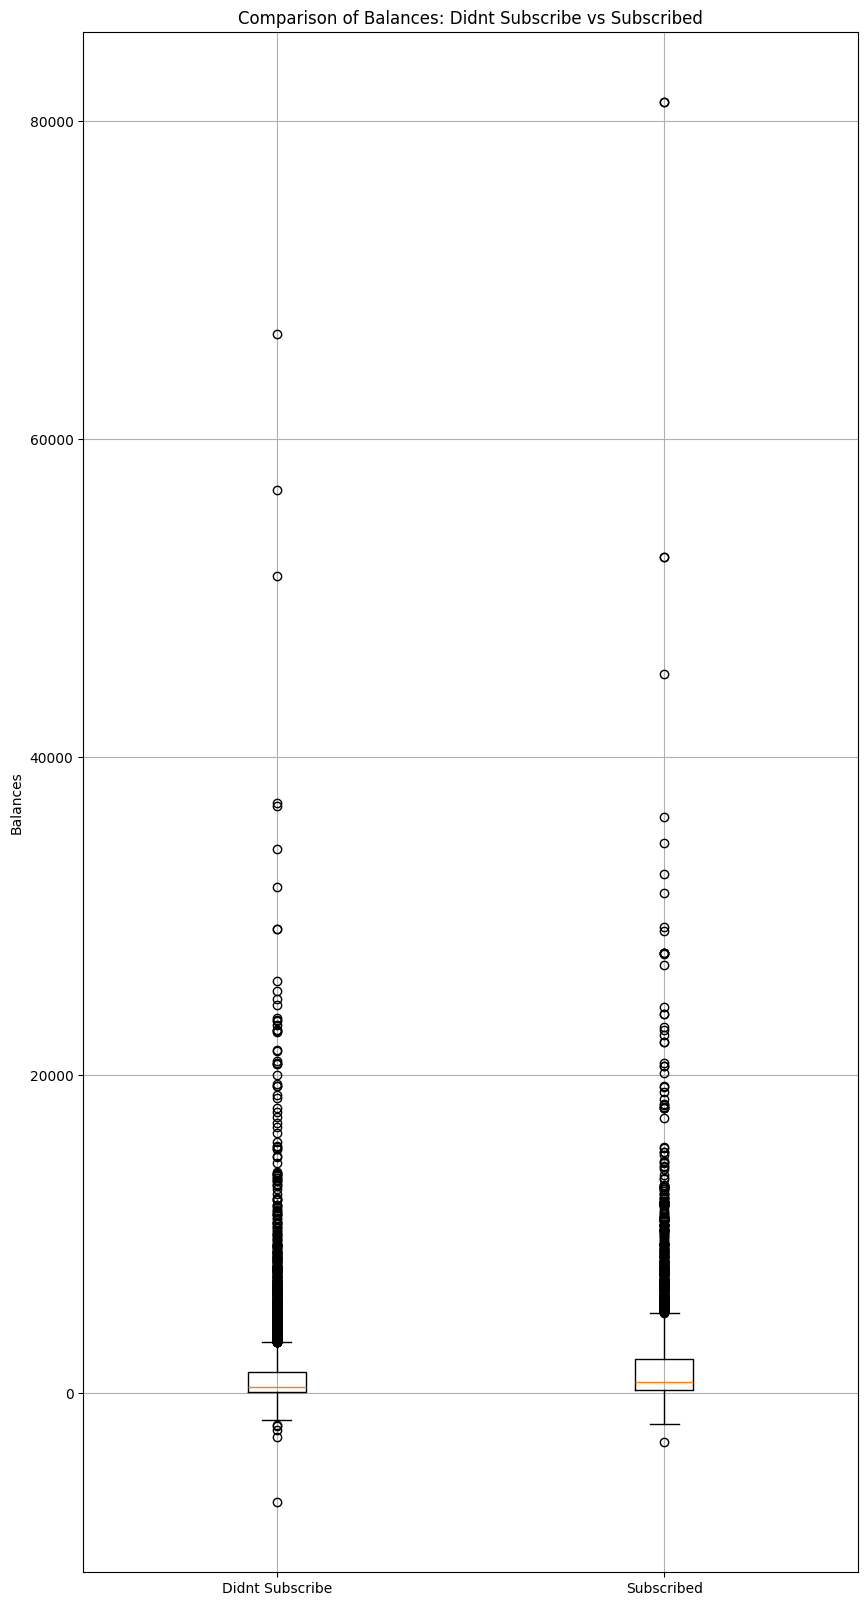

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 20))
plt.boxplot([list(t.group_1["balance"]), list(t.group_2["balance"])], labels=["Didnt Subscribe", "Subscribed"])
plt.title("Comparison of Balances: Didnt Subscribe vs Subscribed")
plt.ylabel("Balances")
plt.grid(True)

plt.show()

In [32]:
t = Ttest(data, "age", "deposit")

C:\Users\aaron\AppData\Local\Temp\ipykernel_20368\227299690.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([list(t.group_1["age"]), list(t.group_2["age"])], labels=["Didnt Subscribe", "Subscribed"])


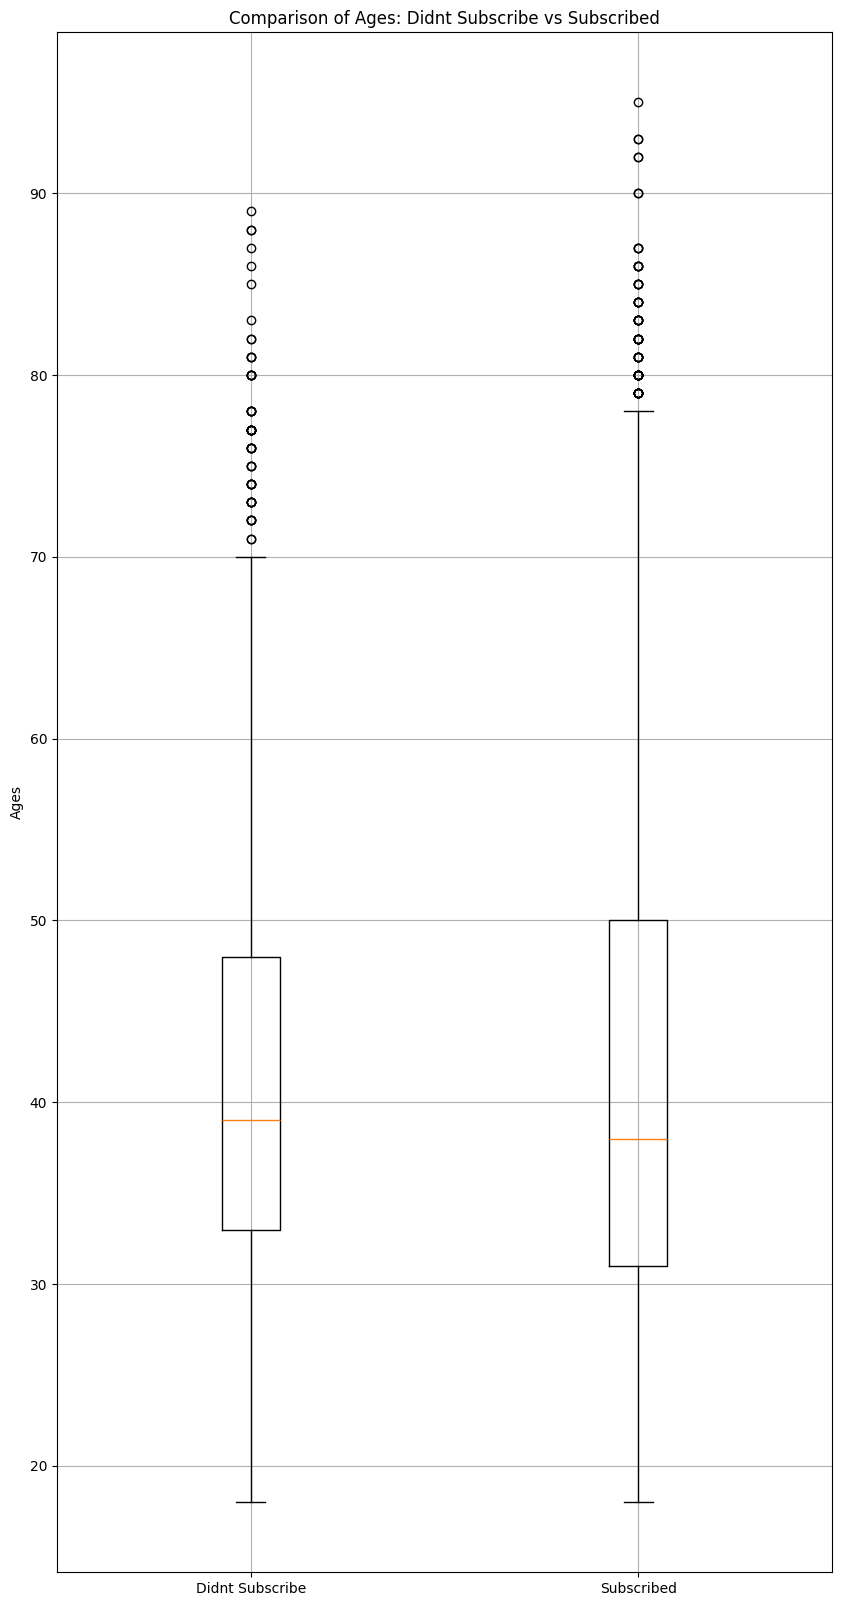

In [33]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 20))
plt.boxplot([list(t.group_1["age"]), list(t.group_2["age"])], labels=["Didnt Subscribe", "Subscribed"])
plt.title("Comparison of Ages: Didnt Subscribe vs Subscribed")
plt.ylabel("Ages")
plt.grid(True)

plt.show()